<a href="https://colab.research.google.com/github/tony3ynot/GAN_MNIST/blob/main/GAN_(MNIST_generation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn

from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.utils import save_image

# Model Architecture

In [2]:
## Generator Model
latent_dim = 100

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 1*28*28),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)
        return img

In [3]:
## Discriminator Model
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(1*28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flattened = img.view(img.size(0), -1)
        output = self.model(flattened)
        return output

# Training Process

In [12]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

train_dataset = datasets.MNIST(root="./dataset", train=True, download=True, transform=transforms)
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers=2)

In [13]:
generator = Generator()
discriminator = Discriminator()

generator.to(DEVICE)
discriminator.to(DEVICE)

loss = nn.BCELoss()
loss.to(DEVICE)

lr = 0.0002

optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr)
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr)

Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


In [14]:
import time

n_epochs = 100
start_time = time.time()

for epoch in range(n_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # labels
        real = torch.ones(imgs.size(0), 1).to(DEVICE)
        fake = torch.zeros(imgs.size(0), 1).to(DEVICE)

        # real images
        real_imgs = imgs.to(DEVICE)

        # fake images (generated)
        z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).to(DEVICE)
        generated_imgs = generator(z)

        ## Train Discriminator
        optimizer_D.zero_grad()

        real_loss = loss(discriminator(real_imgs), real) # train on real images
        fake_loss = loss(discriminator(generated_imgs), fake) # train on fake images
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        ## Train Generator
        z = torch.normal(mean=0, std=1, size=(imgs.shape[0], latent_dim)).to(DEVICE)
        generated_imgs = generator(z)

        optimizer_G.zero_grad()

        g_loss = loss(discriminator(generated_imgs), real)

        g_loss.backward()
        optimizer_G.step()


    print(f"[Epoch {epoch}/{n_epochs}] [D loss: {d_loss.item():.6f}] [G loss: {g_loss.item():.6f}] [Elapsed time: {time.time() - start_time:.2f}s]")

[Epoch 0/100] [D loss: 0.126686] [G loss: 8.442410] [Elapsed time: 14.13s]
[Epoch 1/100] [D loss: 0.019275] [G loss: 8.892918] [Elapsed time: 28.08s]
[Epoch 2/100] [D loss: 0.047412] [G loss: 7.453089] [Elapsed time: 42.06s]
[Epoch 3/100] [D loss: 0.059498] [G loss: 8.558253] [Elapsed time: 56.13s]
[Epoch 4/100] [D loss: 0.061774] [G loss: 8.913227] [Elapsed time: 70.22s]
[Epoch 5/100] [D loss: 0.151392] [G loss: 6.104812] [Elapsed time: 84.19s]
[Epoch 6/100] [D loss: 0.106671] [G loss: 4.298234] [Elapsed time: 98.62s]
[Epoch 7/100] [D loss: 0.204665] [G loss: 3.611202] [Elapsed time: 113.30s]
[Epoch 8/100] [D loss: 0.133010] [G loss: 3.814440] [Elapsed time: 127.36s]
[Epoch 9/100] [D loss: 0.170364] [G loss: 3.234881] [Elapsed time: 141.78s]
[Epoch 10/100] [D loss: 0.216267] [G loss: 2.985802] [Elapsed time: 156.44s]
[Epoch 11/100] [D loss: 0.158745] [G loss: 3.645542] [Elapsed time: 170.63s]
[Epoch 12/100] [D loss: 0.377019] [G loss: 3.223082] [Elapsed time: 184.72s]
[Epoch 13/100] [

# Generate MNIST Data

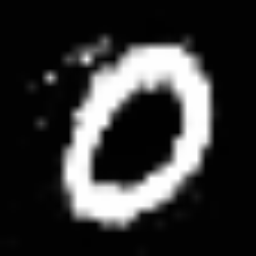

In [24]:
from PIL import Image as PILImage
from IPython.display import display

z = torch.normal(mean=0, std=1, size=(latent_dim,)).to(DEVICE)
generator.to(DEVICE)

generator.eval()
with torch.no_grad():
    ten = generator(z.unsqueeze(0))

to_pil = transforms.ToPILImage()
image = to_pil(ten.squeeze(0).cpu())

image = image.resize((256, 256), PILImage.BILINEAR)
display(image)